Housing Prices Analysis (US Cities Housing Market Data)

The objective of this project is to analyze housing market trends across selected U.S. cities, identify price patterns, evaluate supply and demand dynamics, and generate actionable insights from historical housing data.

In [4]:
import pandas as pd

file_path = "city_market_tracker.tsv000"  # change to what the file is named
df = pd.read_csv(file_path, sep="\t")

# df.head()
# df.info()
df.describe()
# df.shape
# df.columns

,PERIOD_DURATION,REGION_TYPE_ID,TABLE_ID,PROPERTY_TYPE_ID,MEDIAN_SALE_PRICE,MEDIAN_SALE_PRICE_MOM,MEDIAN_SALE_PRICE_YOY,MEDIAN_LIST_PRICE,MEDIAN_LIST_PRICE_MOM,MEDIAN_LIST_PRICE_YOY,...,SOLD_ABOVE_LIST,SOLD_ABOVE_LIST_MOM,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION_METRO_CODE
count,6165903.0,6165903.0,6.165903e+06,6.165903e+06,6.159002e+06,4.993242e+06,4.889204e+06,5.144720e+06,4.319715e+06,4.207855e+06,...,6.124530e+06,4.965898e+06,4.861481e+06,3.354056e+06,2.771129e+06,2.532257e+06,5.634195e+06,4.647033e+06,4.509135e+06,6.165903e+06
mean,30.0,6.0,1.808000e+04,3.468048e+00,3.257589e+05,1.292146e+00,1.268153e+00,3.625494e+05,8.631180e-02,1.607678e-01,...,2.356271e-01,4.187319e-04,1.198157e-02,2.742901e-01,3.831088e-03,7.323680e-03,2.413990e-01,-9.496256e-04,2.278105e-02,3.048752e+04
std,0.0,0.0,1.053399e+04,4.198328e+00,4.467878e+05,1.309322e+03,4.099830e+02,1.411286e+06,4.670221e+00,1.022697e+01,...,2.972165e-01,3.141207e-01,3.252922e-01,1.887244e-01,1.606096e-01,1.753189e-01,2.960289e-01,2.580114e-01,2.722164e-01,1.151768e+04
min,30.0,6.0,3.000000e+00,-1.000000e+00,1.000000e+00,-9.999950e-01,-9.999990e-01,1.000000e+02,-9.998496e-01,-9.999550e-01,...,0.000000e+00,-1.000000e+00,-1.000000e+00,1.119946e-04,-9.565217e-01,-9.791667e-01,0.000000e+00,-1.000000e+00,-1.000000e+00,1.010000e+04
25%,30.0,6.0,9.287000e+03,-1.000000e+00,1.385000e+05,-1.360494e-01,-8.932259e-02,1.600000e+05,-1.063636e-01,-6.124949e-02,...,0.000000e+00,-9.615385e-02,-9.523810e-02,1.500000e-01,-7.137955e-02,-7.662981e-02,0.000000e+00,-6.866538e-02,-4.807692e-02,1.950000e+04
50%,30.0,6.0,1.790600e+04,4.000000e+00,2.299000e+05,5.000000e-03,7.151837e-02,2.599000e+05,2.004410e-03,6.499322e-02,...,1.250000e-01,0.000000e+00,0.000000e+00,2.312071e-01,0.000000e+00,2.840909e-03,1.111111e-01,0.000000e+00,0.000000e+00,3.282000e+04
75%,30.0,6.0,2.570700e+04,6.000000e+00,3.800000e+05,1.705686e-01,2.684992e-01,4.199500e+05,1.305452e-01,2.135922e-01,...,3.846154e-01,9.696970e-02,1.325431e-01,3.333333e-01,7.678019e-02,8.843537e-02,4.285714e-01,6.666667e-02,1.111111e-01,4.006000e+04
max,30.0,6.0,3.885800e+04,1.300000e+01,1.000000e+08,2.874999e+06,3.849990e+05,1.000000e+09,3.249000e+03,1.031567e+04,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.545455e-01,9.885057e-01,1.000000e+00,1.000000e+00,1.000000e+00,4.982000e+04


PHASE 1 — DATA CLEANING
Step 1: Initial Filtering (Very Important)

Your dataset includes:

Multiple property types

Seasonally adjusted and non-adjusted data

Different region types

We need to clean it strategically.

In [5]:
df['PROPERTY_TYPE'].value_counts()
df['IS_SEASONALLY_ADJUSTED'].value_counts()
df['REGION_TYPE'].value_counts()

REGION_TYPE
place    6165903
Name: count, dtype: int64

In [6]:
# Keep only Single Family homes
df = df[df['PROPERTY_TYPE'] == 'Single Family Residential']

# Keep only seasonally adjusted data
df = df[df['IS_SEASONALLY_ADJUSTED'] == True]

# Keep only City-level data
df = df[df['REGION_TYPE'] == 'city']

Step 2: Convert Date

In [7]:
df['PERIOD_BEGIN'] = pd.to_datetime(df['PERIOD_BEGIN'])
df = df.sort_values('PERIOD_BEGIN')

Step 3: Handle Missing Values

In [8]:
df.isnull().sum().sort_values(ascending=False)

PERIOD_BEGIN                      0
PERIOD_END                        0
PERIOD_DURATION                   0
REGION_TYPE                       0
REGION_TYPE_ID                    0
TABLE_ID                          0
IS_SEASONALLY_ADJUSTED            0
REGION                            0
CITY                              0
STATE                             0
STATE_CODE                        0
PROPERTY_TYPE                     0
PROPERTY_TYPE_ID                  0
MEDIAN_SALE_PRICE                 0
MEDIAN_SALE_PRICE_MOM             0
MEDIAN_SALE_PRICE_YOY             0
MEDIAN_LIST_PRICE                 0
MEDIAN_LIST_PRICE_MOM             0
MEDIAN_LIST_PRICE_YOY             0
MEDIAN_PPSF                       0
MEDIAN_PPSF_MOM                   0
MEDIAN_PPSF_YOY                   0
MEDIAN_LIST_PPSF                  0
MEDIAN_LIST_PPSF_MOM              0
MEDIAN_LIST_PPSF_YOY              0
HOMES_SOLD                        0
HOMES_SOLD_MOM                    0
HOMES_SOLD_YOY              

For now, focus on core columns:

MEDIAN_SALE_PRICE

HOMES_SOLD

INVENTORY

MEDIAN_DOM

If missing values are small → drop them:

In [9]:
df = df.dropna(subset=['MEDIAN_SALE_PRICE'])

PHASE 2 — STRATEGIC FOCUS
Choose 5 major cities.

Example strong comparison set:

Austin

Miami

Seattle

Denver

Atlanta

Then filter:

In [10]:
df['CITY'].value_counts().head(10)

Series([], Name: count, dtype: int64)

In [11]:
selected_cities = ['Austin', 'Miami', 'Seattle', 'Denver', 'Atlanta']
df = df[df['CITY'].isin(selected_cities)]

PHASE 3 — 7 STRONG VISUALIZATIONS
1-  Median Sale Price Trend

In [12]:
df['PERIOD_BEGIN'] = pd.to_datetime(df['PERIOD_BEGIN'])
df = df.sort_values('PERIOD_BEGIN')

In [13]:
selected_cities = ['Austin', 'Miami', 'Seattle', 'Denver', 'Atlanta']
df_filtered = df[df['CITY'].isin(selected_cities)]

In [20]:
selected_cities = ['Austin', 'Miami', 'Seattle', 'Denver', 'Atlanta']
df['CITY'].unique()[:20]
top_cities = df['CITY'].value_counts().head(5).index.tolist()
top_cities
df_filtered = df[df['CITY'].isin(top_cities)]
df['CITY'].value_counts().head(10)

Series([], Name: count, dtype: int64)

C:\Users\mille\AppData\Local\Temp\ipykernel_12644\2928364458.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='City')


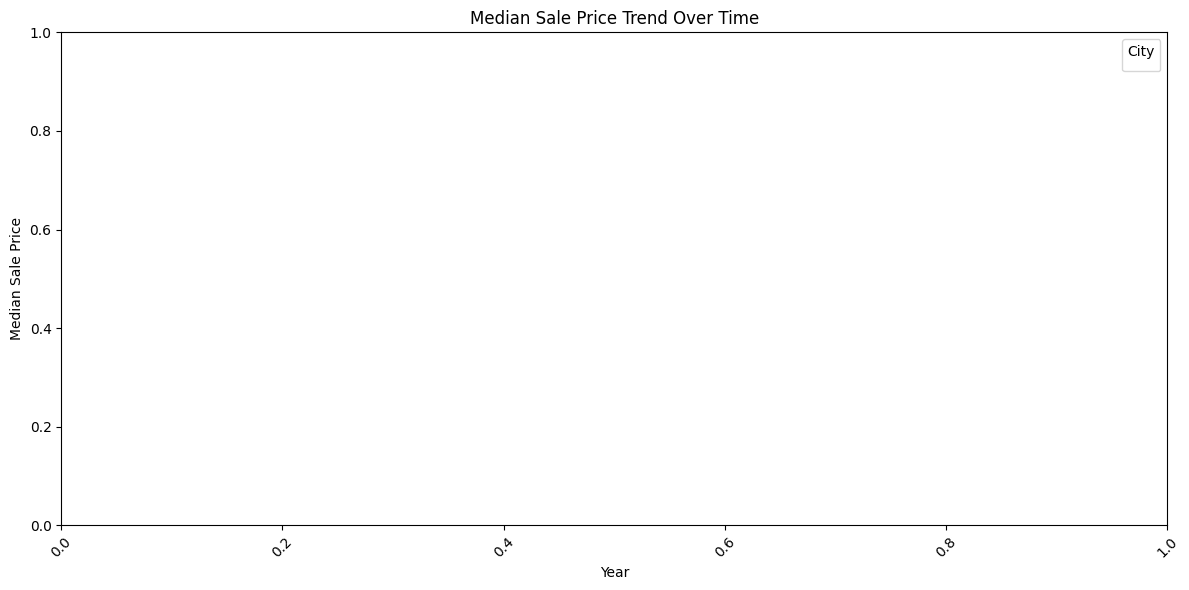

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_filtered,
    x='PERIOD_BEGIN',
    y='MEDIAN_SALE_PRICE',
    hue='CITY'
)

plt.title('Median Sale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()